In [2]:
pip install PyChest

In [3]:
import PyChest
import numpy as np
np.random.seed(1)

First experience : Bernoulli

In [34]:
seq=[]
seq.append(np.random.binomial(1,p=0.2, size = 2000))
seq.append(np.random.binomial(1,p=0.7, size = 4500))
seq.append(np.random.binomial(1,p=0.2, size= 1500))

seq = np.concatenate(seq)

print((seq))



[1 1 0 ... 1 1 1]


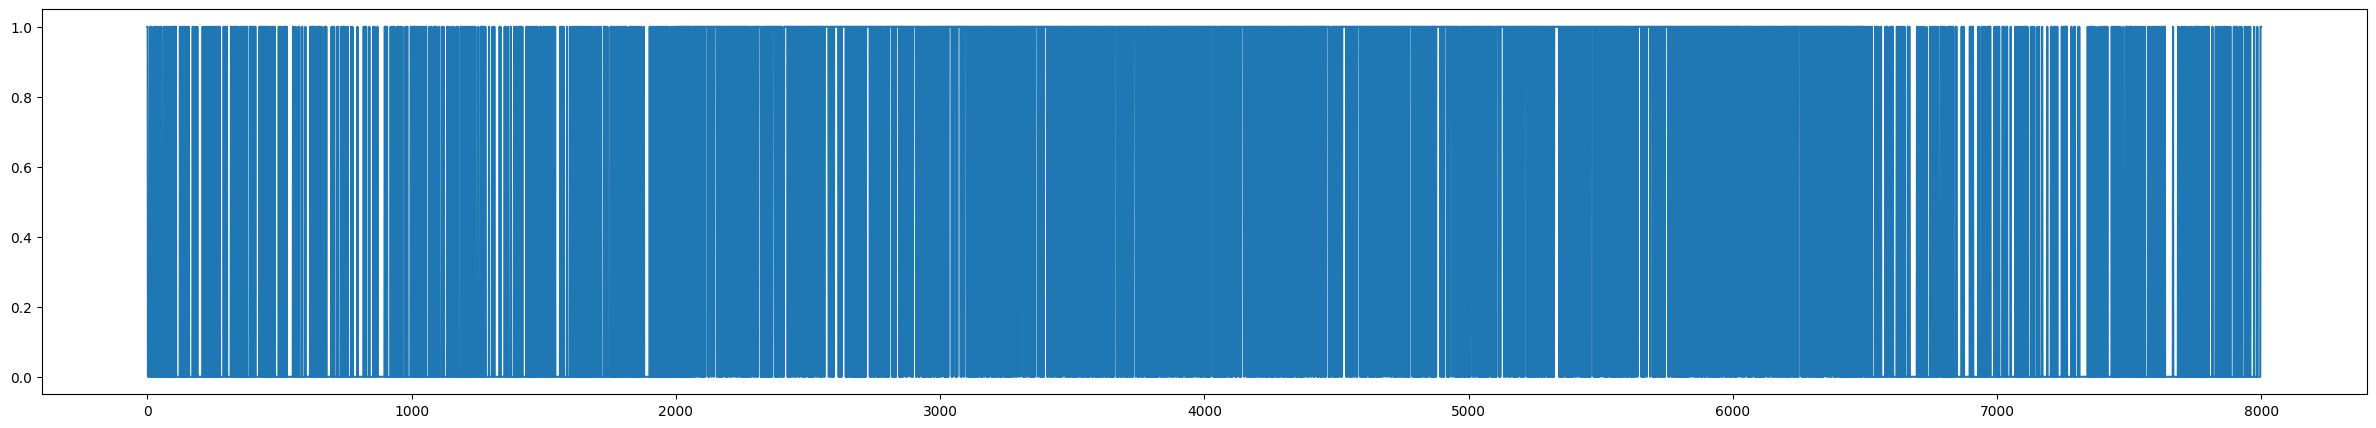

In [35]:
import matplotlib.pyplot as plt

x=[i for i in range(len(seq))]

plt.figure(figsize=(30, 5))

plt.plot(x,seq)
plt.show()


In [40]:
min_distance = 0.125
process_count = 2
estimates = PyChest.list_estimator(seq, min_distance)
print(estimates)

[2000, 6499, 4952, 3116, 898]


In [43]:
min_distance = 0.125
process_count = 2

estimates = PyChest.find_changepoints(seq, min_distance, process_count)

print(estimates)

[2000, 6499]


[1938, 6425]


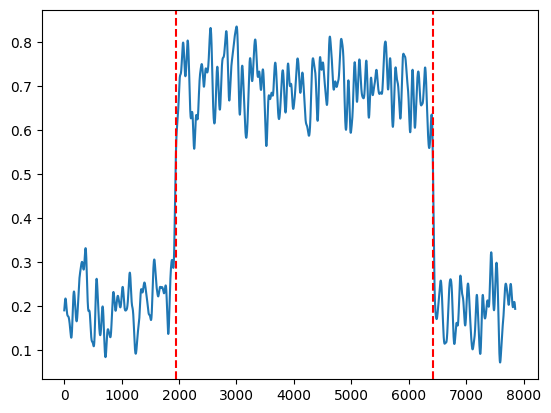

In [49]:
N = 25
seq = np.convolve(seq, np.ones(N)/N, mode='valid')
estimates = PyChest.find_changepoints(seq, min_distance, process_count)


x=[i for i in range(len(seq))]

print(estimates)

plt.plot(x,seq)
plt.axvline(x=estimates[0], color='red', linestyle='--')
plt.axvline(x=estimates[1], color='red', linestyle='--')
plt.show()




Second Experience: uniform

In [4]:
seq=[]
seq.append(np.random.uniform(low=0 , high = 1.0, size = 2000))
seq.append(np.random.uniform(low=0.1, high = 1.1, size = 4500))
seq.append(np.random.uniform(low=0 , high = 1.0, size= 1500))

seq = np.concatenate(seq)

print((seq))

min_distance = 0.125
process_count = 2
estimates = PyChest.find_changepoints(seq, min_distance, process_count)

print(estimates)


[4.17022005e-01 7.20324493e-01 1.14374817e-04 ... 6.74658793e-01
 6.84230726e-01 8.21391312e-01]
[2621, 6126]


[1535, 6453]


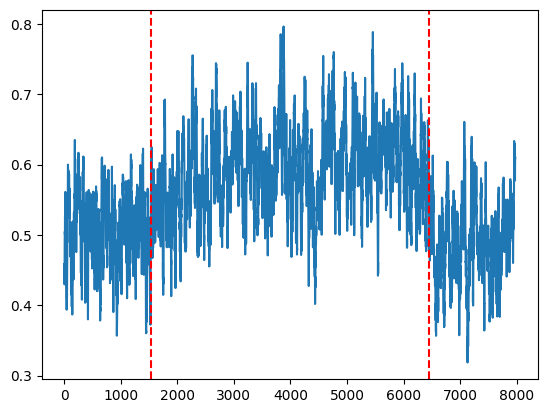

In [5]:
import matplotlib.pyplot as plt

N = 25
seq = np.convolve(seq, np.ones(N)/N, mode='valid')
estimates = PyChest.find_changepoints(seq, min_distance, process_count)


x=[i for i in range(len(seq))]

print(estimates)

plt.plot(x,seq)
plt.axvline(x=estimates[0], color='red', linestyle='--')
plt.axvline(x=estimates[1], color='red', linestyle='--')
plt.show()


#Hidden Irrational Rotation

[1655]


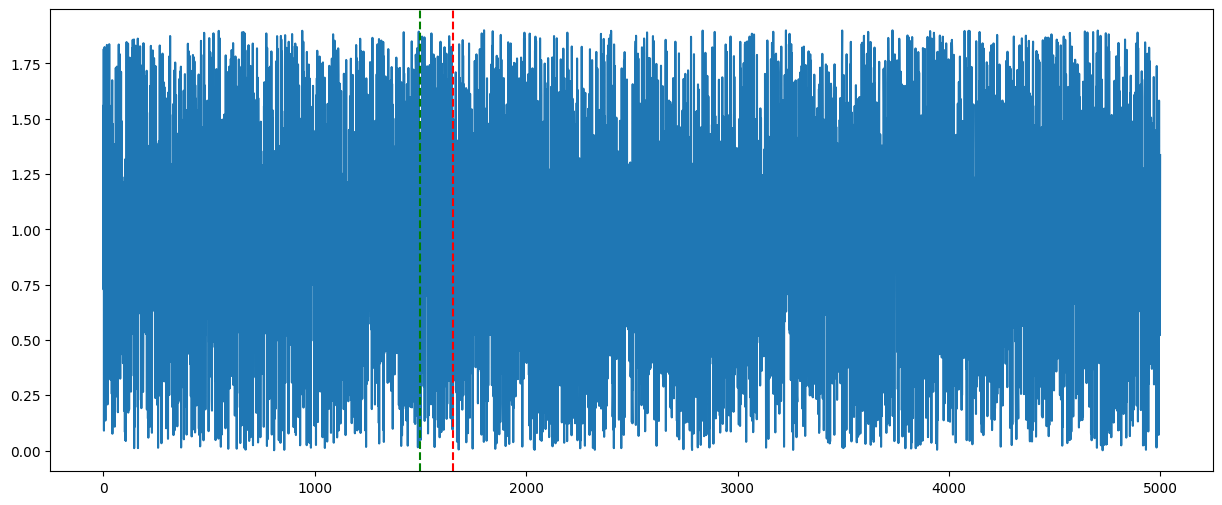

In [7]:
import matplotlib.pyplot as plt

# Parameters
beta1 = 0.452341643253462432

beta2 = 0.6345354645623456234234
changepoint = 1500
t_total = 5000
process_count=2
min_distance = 0.15

# Sequence generation
R1 = np.zeros(changepoint)
R2 = np.zeros(t_total - changepoint)
Y1 = np.zeros(changepoint)
Y2 = np.zeros(t_total - changepoint)

R1[0] = np.random.uniform(0, 1)
R2[0] = np.random.uniform(0, 1)

for i in range(1, changepoint):
    R1[i] = R1[i-1] + beta1 - np.floor(R1[i-1] + beta1)

for i in range(1, t_total - changepoint):
    R2[i] = R2[i-1] + beta2 - np.floor(R2[i-1] + beta2)

Y1 = (R1 >= 0.5).astype(int)
Y2 = (R2 >= 0.5).astype(int)


U1 = np.random.uniform(0, 1, changepoint)
V1 = np.random.uniform(0.9, 1.9, changepoint)
U2 = np.random.uniform(0, 1, t_total - changepoint)
V2 = np.random.uniform(0.9, 1.9, t_total - changepoint)


Z1 = U1 * (1 - Y1) + V1 * Y1
Z2 = U2 * (1 - Y2) + V2 * Y2


Z = np.concatenate((Z1, Z2))

estimates = PyChest.find_changepoints(Z, min_distance, process_count)
print(estimates)
changepoint_test = estimates[0]

# Visualisation
plt.figure(figsize=(15, 6))
plt.plot(Z)

plt.axvline(x=changepoint, color='g', linestyle='--')

plt.axvline(x=changepoint_test, color='r', linestyle='--')
plt.show()
